# Import das bibliotecas

In [1]:
import bibmon
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\pedro\anaconda3\envs\TCC_env\Lib\site-packages\bibmon\_load_data.py:61: SyntaxWarning: invalid escape sequence '\s'
  train_df = create_df_with_dates(filepath, sep='\s+',names=tags,
c:\Users\pedro\anaconda3\envs\TCC_env\Lib\site-packages\bibmon\_load_data.py:67: SyntaxWarning: invalid escape sequence '\s'
  sep = '\s+',


# Carrega os dados do TEP

In [7]:
# Carrega dados normais (train_id=0) e dados com falha IDV(1) (test_id=1)
df_train, df_test = bibmon.load_tennessee_eastman(train_id=0, test_id=4)

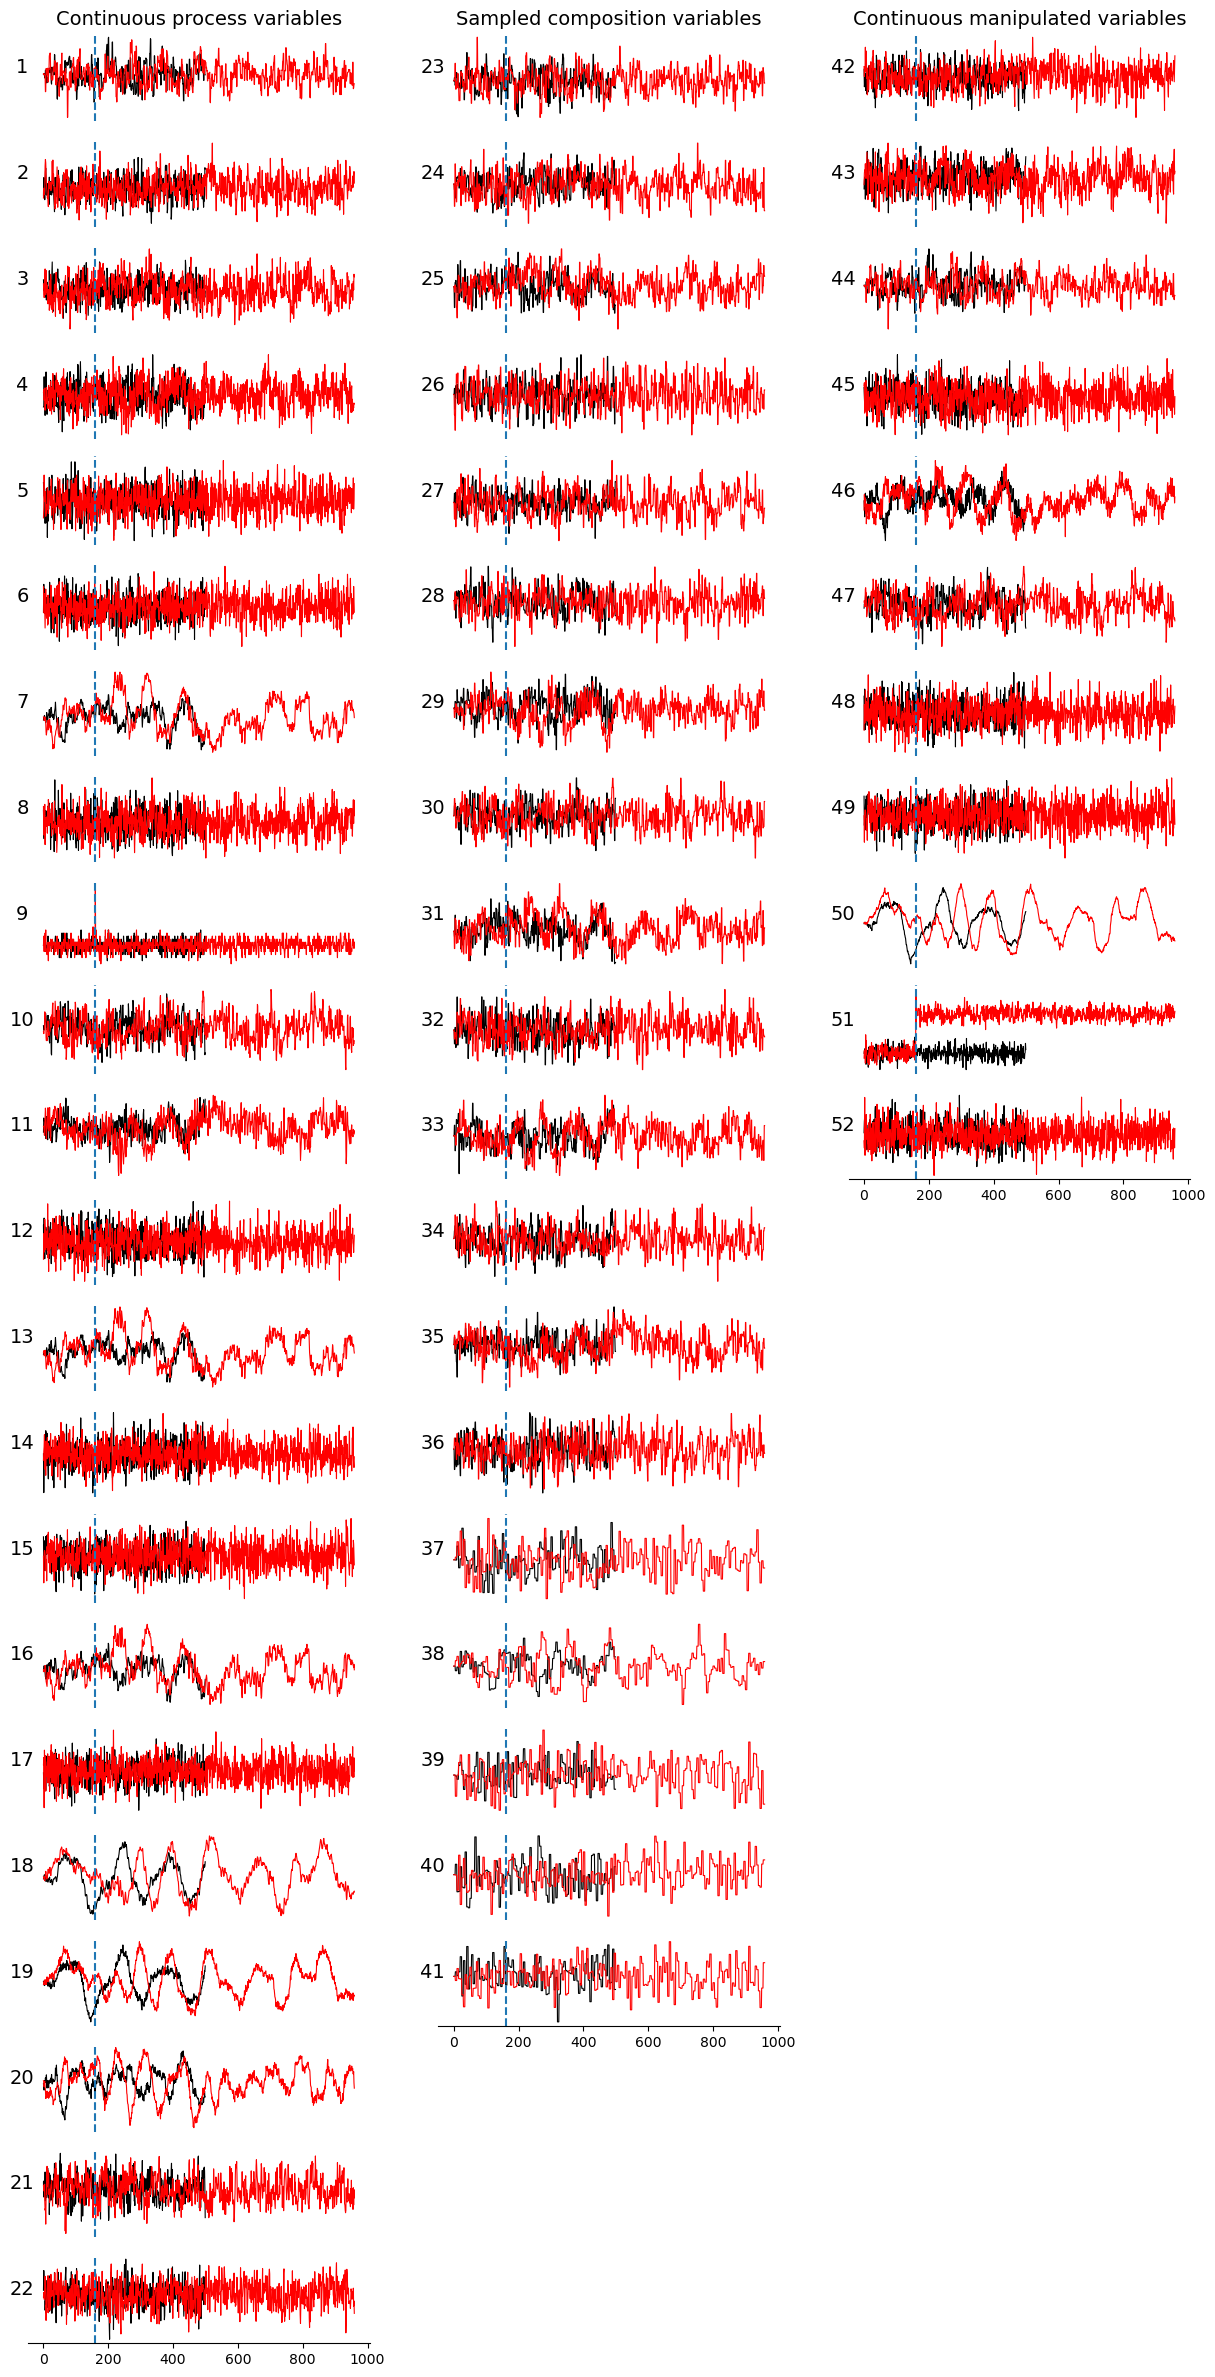

In [8]:
def plot_tep_fault(df_train, df_test):
            
    fig, ax = plt.subplots(22, 3, figsize=(15, 30))

    for i in range(22):
        ax[i,0].plot(df_train.iloc[:,i].values,c='k',linewidth=0.8)
        ax[i,0].plot(df_test.iloc[:,i].values,c='r',linewidth=0.8)
        ax[i,0].axvline(160, ls='--')
        ax[i,0].set_yticks([])
        ax[i,0].set_ylabel(i+1,rotation=0,fontsize=14)
        for j in range(3):
            ax[i,j].spines["top"].set_visible(False)
            ax[i,j].spines["right"].set_visible(False)
            ax[i,j].spines["left"].set_visible(False)
        if i<(22-1):
            ax[i,0].set_xticks([])
            ax[i,0].spines["bottom"].set_visible(False)

    for i in range(19):
        ax[i,1].plot(df_train.iloc[:,i+22].values,c='k',linewidth=0.8)
        ax[i,1].plot(df_test.iloc[:,i+22].values,c='r',linewidth=0.8)
        ax[i,1].axvline(160, ls='--')
        ax[i,1].set_yticks([])
        ax[i,1].set_ylabel(i+23,rotation=0,fontsize=14)
        if i!=(19-1):
            ax[i,1].set_xticks([])
            ax[i,1].spines["bottom"].set_visible(False)

    for i in range(11):
        ax[i,2].plot(df_train.iloc[:,i+41].values,c='k',linewidth=0.8)
        ax[i,2].plot(df_test.iloc[:,i+41].values,c='r',linewidth=0.8)
        ax[i,2].axvline(160, ls='--')
        ax[i,2].set_yticks([])
        ax[i,2].set_ylabel(i+42,rotation=0,fontsize=14)
        if i!=(11-1):
            ax[i,2].set_xticks([])
            ax[i,2].spines["bottom"].set_visible(False)

    for i in range(19,22):
        ax[i,1].axis('off')

    for i in range(11,22):
        ax[i,2].axis('off')

    ax[0,0].set_title('Continuous process variables',fontsize=14)
    ax[0,1].set_title('Sampled composition variables',fontsize=14)
    ax[0,2].set_title('Continuous manipulated variables',fontsize=14);

plot_tep_fault(df_train, df_test)

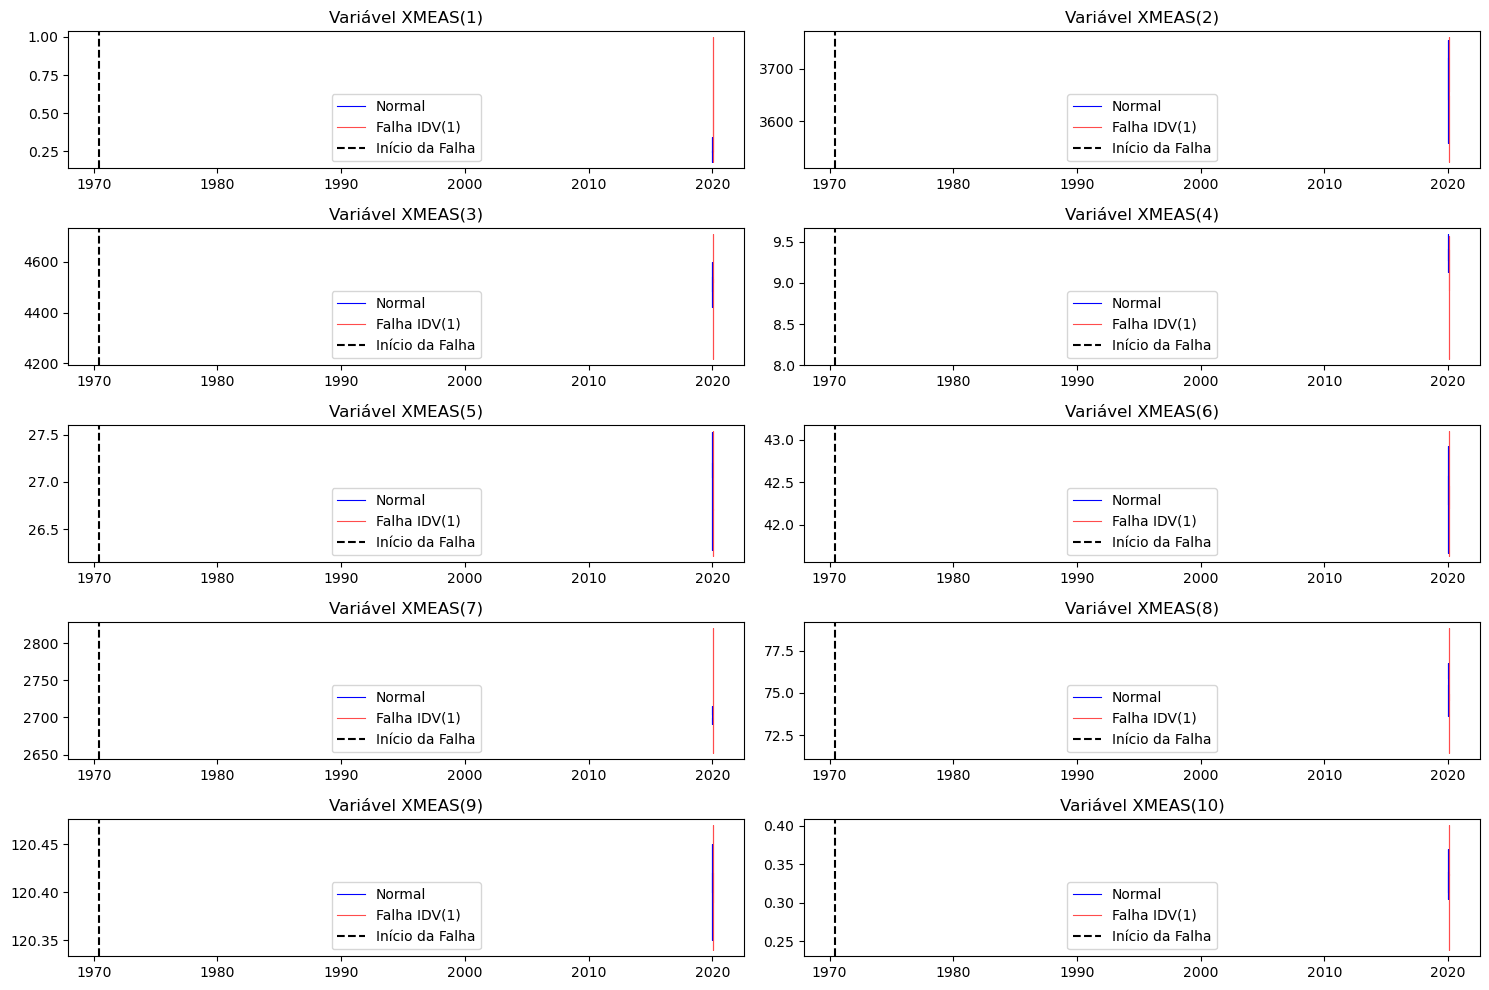

In [3]:
def plotar_graficos(df_normal, df_falha, variaveis_selecionadas=None):
    plt.figure(figsize=(15, 10))

    # Seleciona variáveis (exemplo: primeiras 10 variáveis contínuas)
    variaveis = variaveis_selecionadas if variaveis_selecionadas else df_normal.columns[:10]

    for i, var in enumerate(variaveis, 1):
        plt.subplot(5, 2, i)
        plt.plot(df_normal[var], label='Normal', color='blue', linewidth=0.8)
        plt.plot(df_falha[var], label='Falha IDV(1)', color='red', linewidth=0.8, alpha=0.7)
        plt.axvline(x=160, color='black', linestyle='--', label='Início da Falha')
        plt.title(f'Variável {var}')
        plt.legend()

    plt.tight_layout()
    plt.show()

plotar_graficos(df_normal, df_falha)

In [4]:
df_falha.head()

,XMEAS(1),XMEAS(2),XMEAS(3),XMEAS(4),XMEAS(5),XMEAS(6),XMEAS(7),XMEAS(8),XMEAS(9),XMEAS(10),...,XMV(2),XMV(3),XMV(4),XMV(5),XMV(6),XMV(7),XMV(8),XMV(9),XMV(10),XMV(11)
2020-02-01 00:00:00,0.25025,3657.2,4520.1,9.3965,26.715,42.191,2704.5,74.593,120.42,0.33701,...,53.850,24.670,61.839,22.101,40.078,33.041,48.969,47.459,41.841,18.049
2020-02-01 00:03:00,0.25135,3662.1,4532.3,9.4020,26.644,42.812,2704.9,75.044,120.39,0.33723,...,53.705,24.562,61.348,22.264,40.050,39.154,49.870,47.403,41.188,18.008
2020-02-01 00:06:00,0.25045,3681.9,4493.6,9.2395,26.971,42.282,2705.0,75.405,120.42,0.33643,...,54.167,24.659,61.826,22.312,40.147,39.294,44.511,47.265,41.290,18.009
2020-02-01 00:09:00,0.25056,3667.9,4466.0,9.3602,26.937,42.194,2705.9,75.397,120.41,0.33891,...,54.498,24.648,63.168,22.288,39.845,36.334,46.168,47.410,40.997,17.771
2020-02-01 00:12:00,0.28659,3693.0,4502.5,9.5652,26.999,42.540,2704.3,74.749,120.39,0.34173,...,54.142,28.430,57.566,22.142,40.806,34.882,45.576,47.424,41.290,19.371
